In [ ]:
# Projeto 7DaysOfCode
# Análise dos dados do Senado
# CEAPS (Cota para Exercício da Atividade Parlamentar dos Senadores)
# by geanclm in 22/04/2022

```
Facebook Prophet: biblioteca de previsão
```
[Installation in Python](https://facebook.github.io/prophet/docs/installation.html)

[Quick Start](https://facebook.github.io/prophet/docs/quick_start.html?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Ci%C3%AAncia+de+Dados+3%2F7%3A+Forecasting&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Java%29+Dia+3%2F7%3A+Modelando+um+dom%C3%ADnio#python-api)

In [ ]:
!pip install pystan==2.19.1.1

In [ ]:
!pip install prophet

In [25]:
# import libs
import pandas as pd
import matplotlib as plt
from prophet import Prophet

In [5]:
# Load Dataset

In [7]:
df_ds_y = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/7DaysOfCode/dataset_ceaps_forecasting.csv',
                     encoding='cp1252', dayfirst=True, parse_dates=['ds'])

In [8]:
df_ds_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1461 non-null   datetime64[ns]
 1   y       1461 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.0 KB


In [9]:
df_ds_y.describe()

,y
count,1461.000000
mean,63876.044497
std,53285.501861
min,100.000000
25%,19735.990000
50%,53764.030000
75%,91485.640000
max,444152.910000


In [10]:
df_ds_y.sample(5)

,ds,y
334,2018-12-01,38318.84
484,2019-04-30,144549.69
670,2019-11-02,6705.03
422,2019-02-27,114285.47
160,2018-06-10,28557.73


In [11]:
# Período inicial
df_ds_y['ds'].min()

Timestamp('2018-01-01 00:00:00')

In [12]:
# Período final
df_ds_y['ds'].max()

Timestamp('2021-12-31 00:00:00')

In [13]:
df_ds_y_index = df_ds_y.set_index('ds')

<center style="font-size:18pt; background-color:orange">
    <br/><b>TOTAL REEMBOLSO 31 DE DEZEMBRO DE 2021</b><br/>&nbsp;</center>

In [14]:
df_ds_y.tail(1)

,ds,y
1460,2021-12-31,27219.41


In [16]:
df_ds_y_index.tail(1)

,y
ds,
2021-12-31,27219.41


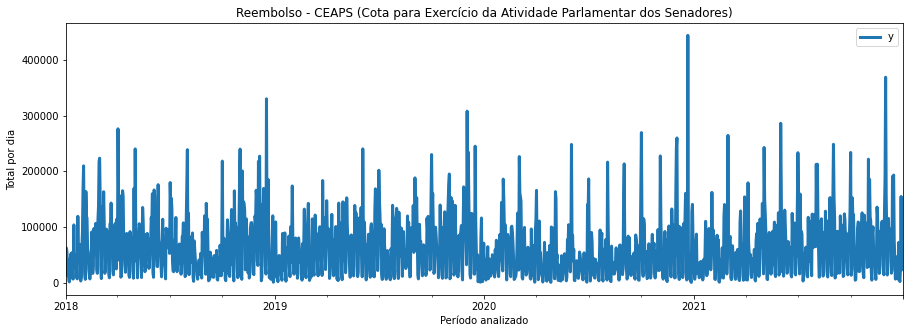

In [17]:
df_ds_y_index.plot(figsize=(15,5),
             linewidth=3,
             fontsize=10,
             title='Reembolso - CEAPS (Cota para Exercício da Atividade Parlamentar dos Senadores)',
             xlabel='Período analizado',
             ylabel= 'Total por dia');

In [ ]:
# É visível no gráfico a acentuação de gastos nos finais de ano.
# Se o gasto é alto nesse período porque não temos o retorno em obras públicas na mesma escala?

In [44]:
# Dataframe para trabalhar com a lib prophet (empresa META)
df_ds_y

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32
...,...,...
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56


In [34]:
# Preparando cada parte dos dados para aplicar o Prophet
dataset = df_ds_y[(df_ds_y['ds'].dt.year < 2021) ] # dados treino [Período 2018-2020]
validation = df_ds_y[(df_ds_y['ds'].dt.year == 2021)] # dados teste [Período 2021]

In [23]:
# imprimir o tamanho de cada Dataset
print (f'Dataset {len(dataset)}, validation {len(validation)}')

Dataset 1096, validation 365


In [72]:
# PROCEDMIENTO DE SEGURANÇA E PARCIAL DE TRABALHO PARA COMPARTILHAMENTO EM EQUIPE
# salvar os dois Dataset em arquivo .csv
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

In [77]:
# ? VERIFICAR SE É NECESSÁRIO PROCESSO DE IMPORTAÇÃO COM NOVOS PARAMETROS NO .csv
# importar dataset validation
# series = pd.read_csv('/content/dataset.csv', squeeze=True,
                        # header=0, index_col=0, encoding='cp1252', dayfirst=True, parse_dates=True)

In [85]:
dataset

,ds,y
0,2018-01-01,13062.46
1,2018-01-02,61972.66
2,2018-01-03,54424.44
3,2018-01-04,21775.57
4,2018-01-05,41703.32
...,...,...
1091,2020-12-27,100.00
1092,2020-12-28,127452.19
1093,2020-12-29,140402.14
1094,2020-12-30,81555.71


In [86]:
validation

,ds,y
1096,2021-01-01,20971.94
1097,2021-01-02,5863.44
1098,2021-01-03,15293.99
1099,2021-01-04,61860.13
1100,2021-01-05,86977.14
...,...,...
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56


In [87]:
# CONFIRMAR SE É NECESSÁRIO ESSA ETAPA!
# dataframe = pd.DataFrame({'ds' : 'dataset.index', 'y' : 'dataset.values'})

In [76]:
# instanciar o modelo em uma variável
model = Prophet()

In [88]:
# gerar o modelo
model.fit(dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [89]:
# gerar dados preditivos
futuro = model.make_future_dataframe(periods=12, freq='M')

In [90]:
futuro

,ds
0,2018-01-01
1,2018-01-02
2,2018-01-03
3,2018-01-04
4,2018-01-05
...,...
1103,2021-08-31
1104,2021-09-30
1105,2021-10-31
1106,2021-11-30


In [92]:
# prevendo valores para dados futuros
forecast = model.predict(futuro)

In [93]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
1101,2021-06-30,63031.376017,10606.713831,112536.279276
1102,2021-07-31,-9619.214873,-60065.136253,38081.214758
1103,2021-08-31,52986.411072,475.817171,102112.289869
1104,2021-09-30,51537.593496,-2930.135108,103573.492581
1105,2021-10-31,546.711251,-52897.864612,49901.746760
1106,2021-11-30,88513.157189,36747.590741,139311.375425
1107,2021-12-31,7052.873599,-43993.842596,57799.898220


In [56]:
# VERIFICAR SE É NECESSÁRIO IMPORTAR COM NOVOS PARAMETROS NO .csv
# importar dataset validation (dados de teste)
# validation_df = pd.read_csv('/content/validation.csv', encoding='cp1252', dayfirst=True, parse_dates=['ds'])

In [95]:
# validation_df.info()
validation_df = validation.copy()

In [96]:
validation_df

,ds,y
1096,2021-01-01,20971.94
1097,2021-01-02,5863.44
1098,2021-01-03,15293.99
1099,2021-01-04,61860.13
1100,2021-01-05,86977.14
...,...,...
1456,2021-12-27,28552.41
1457,2021-12-28,154547.27
1458,2021-12-29,22495.76
1459,2021-12-30,118345.56


In [98]:
validation_df['ds']

1096   2021-01-01
1097   2021-01-02
1098   2021-01-03
1099   2021-01-04
1100   2021-01-05
          ...    
1456   2021-12-27
1457   2021-12-28
1458   2021-12-29
1459   2021-12-30
1460   2021-12-31
Name: ds, Length: 365, dtype: datetime64[ns]

In [99]:
# aplicar modelo Prophet com os dados de teste
forecast_v = model.predict(validation_df)

In [100]:
forecast_v[['ds','yhat','yhat_lower','yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
358,2021-12-25,-13203.405882,-64868.626907,37136.873218
359,2021-12-26,-22714.420200,-73627.928933,23822.855068
360,2021-12-27,59092.540125,8252.866874,111738.201376
361,2021-12-28,37498.669185,-15312.546578,90491.205930
362,2021-12-29,36214.389027,-15229.744701,86300.242994
363,2021-12-30,21448.091147,-27022.229293,71401.549056
364,2021-12-31,7052.873599,-42223.484632,58886.672934


In [102]:
# AVALIAR OS RESULTADOS OBTIDOS
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# rmse = sqrt (mean_squared_error(validation.values, forecast_v.yhat))
# print(f'Teste RMSE: {rmse}')

In [ ]:
# ABAIXO O GRÁFICO GERADO DA COMPARAÇÃO DOS DADOS PREVISTOS COM OS DADOS TREINO

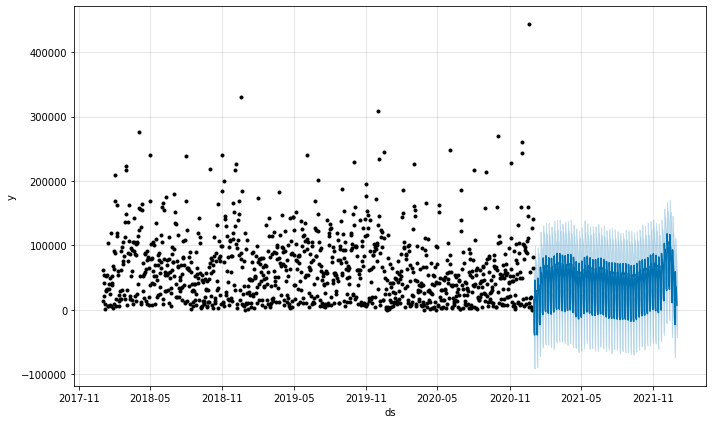

In [104]:
fig1 = model.plot(forecast_v)

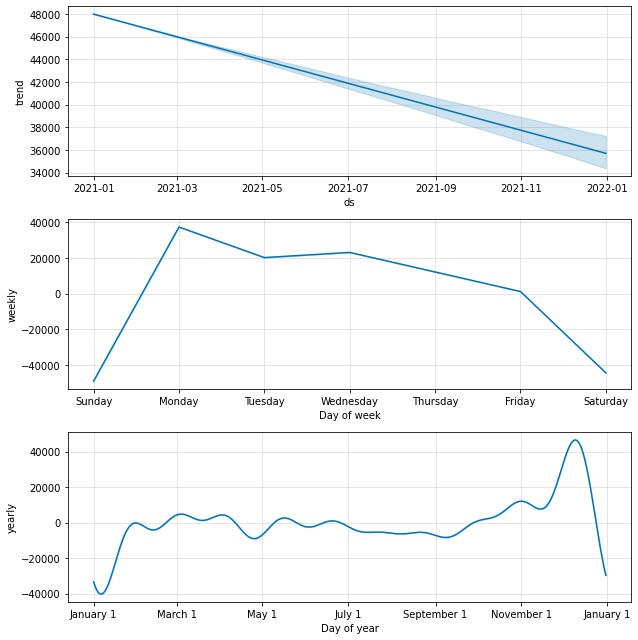

In [105]:
fig2 = model.plot_components(forecast_v)